# Evaluation Project 5: Census Income Project

Problem Statement: 


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats 
from scipy.stats import zscore 
import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

# Understanding the dataset: 

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

We do have features like age, workclass, education, marital status, and many more that are determining the target variable whether the person makes over $50K a year. Our target variable is INCOME, it is dependent on the feature variables. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We do have workclass, education, marital status, occupation, relationship, race, sex, native country, and income as object data type. We need to encode them to train the model on the basis of significance it has with target variable. But let's first understand each variable one by one.  

In [6]:
### Whether there are null values avilable in the dataset? 
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
### Understanding each variable in terms of the unique category they inlcude along with their value count. 
for i in df.columns:
        print(df[i].value_counts())
        print('--------------------------------------')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
--------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
--------------------------------------
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
--------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Do

Text(0.5, 1.0, 'Workclass Classification')

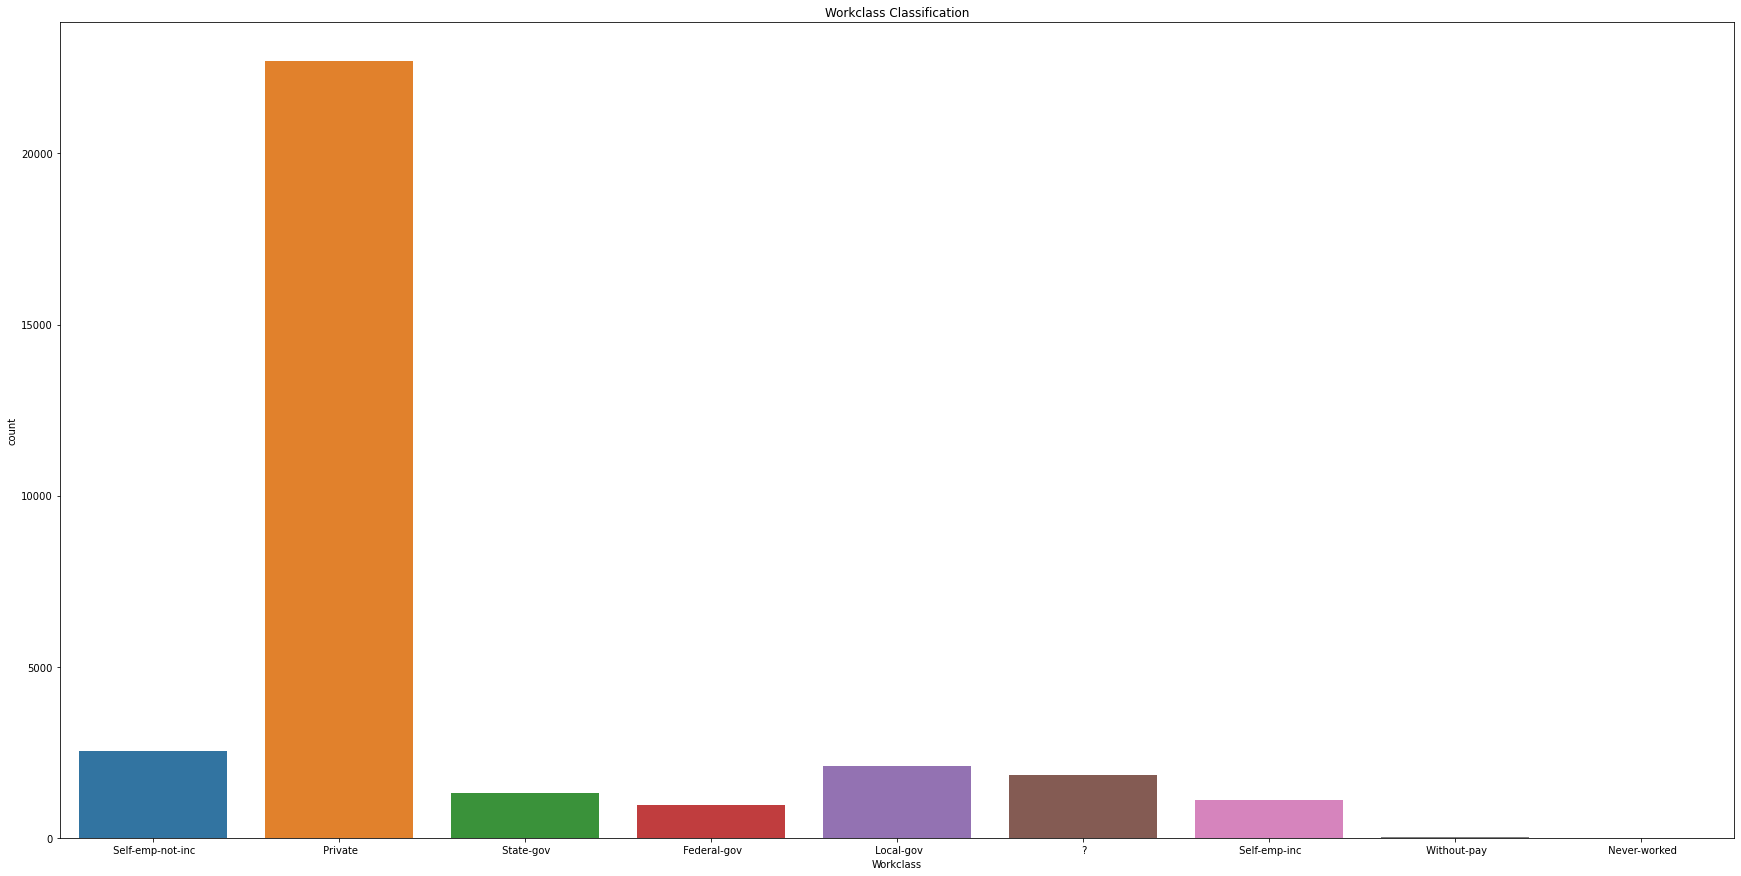

In [8]:
plt.figure(figsize=[30,15])
sns.countplot(df['Workclass'])
plt.title('Workclass Classification')

Text(0.5, 1.0, 'Education Classification')

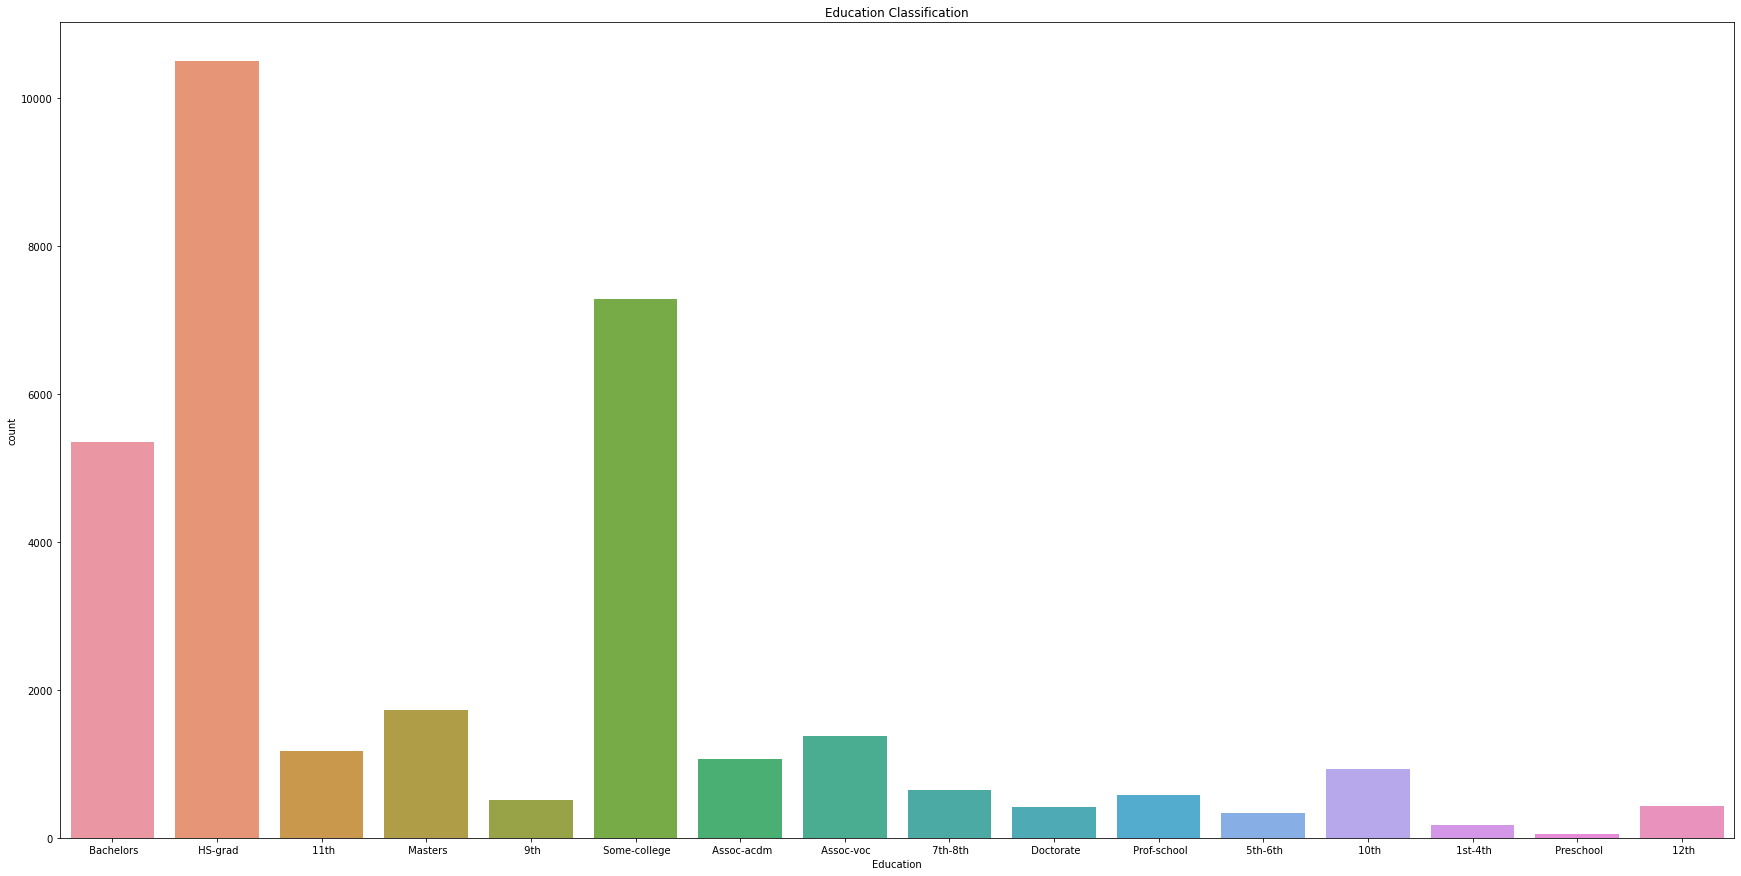

In [9]:
plt.figure(figsize=[30,15])
sns.countplot(df['Education'])
plt.title('Education Classification')

Text(0.5, 1.0, 'Marital Status Classification')

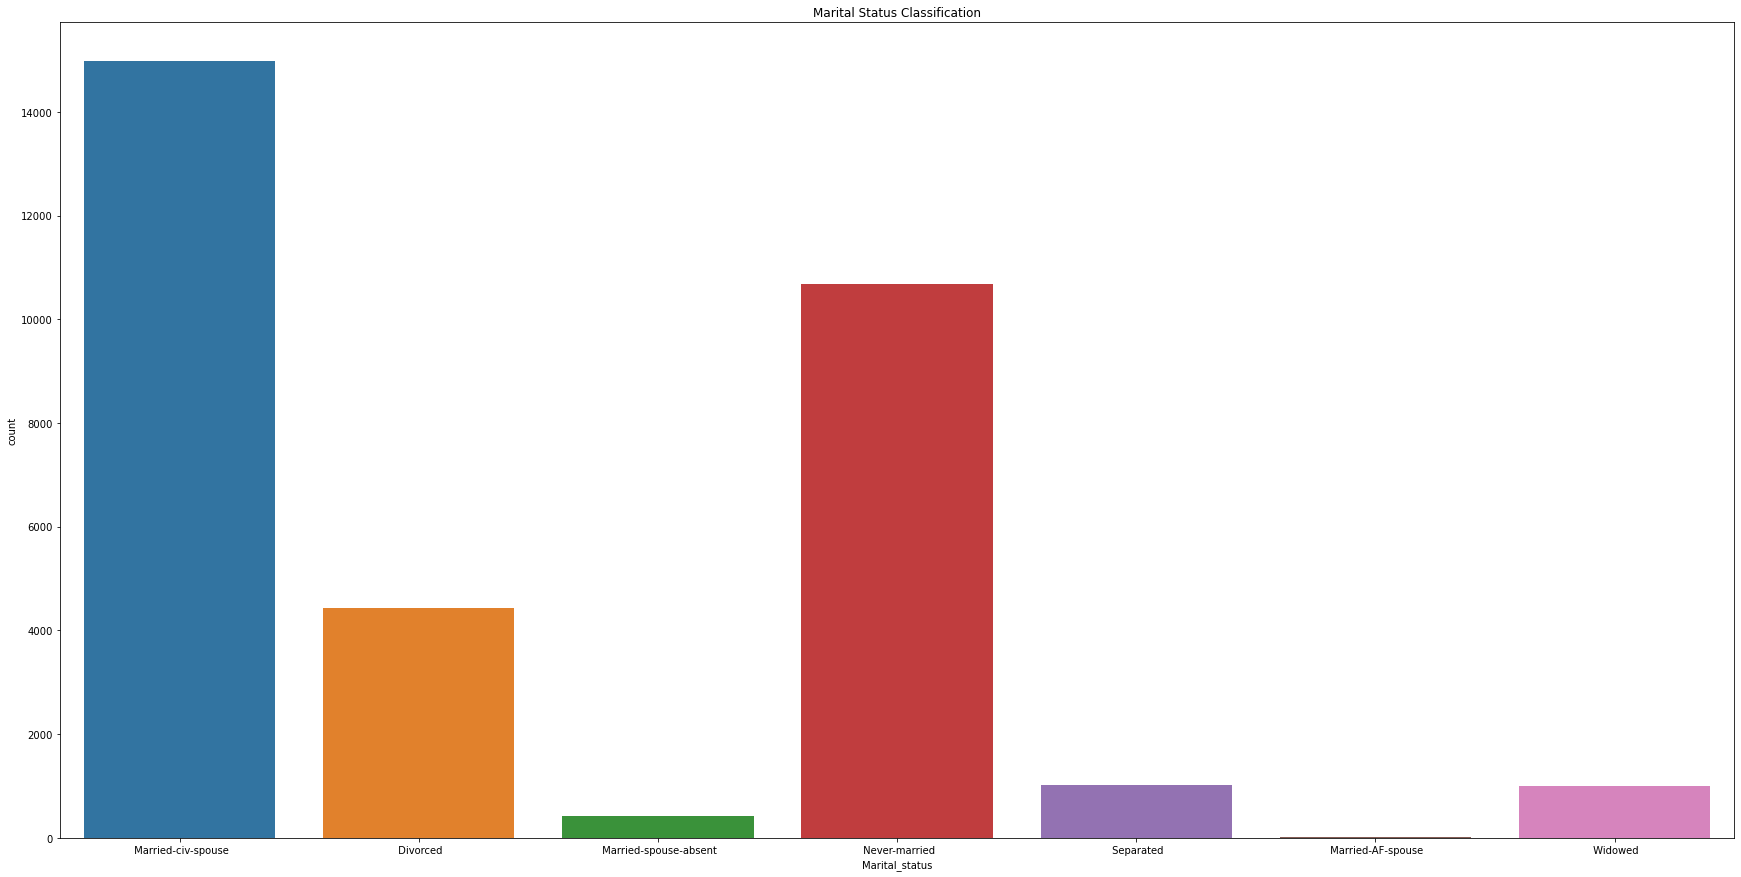

In [10]:
plt.figure(figsize=[30,15])
sns.countplot(df['Marital_status'])
plt.title('Marital Status Classification')

Text(0.5, 1.0, 'Occupation Classification')

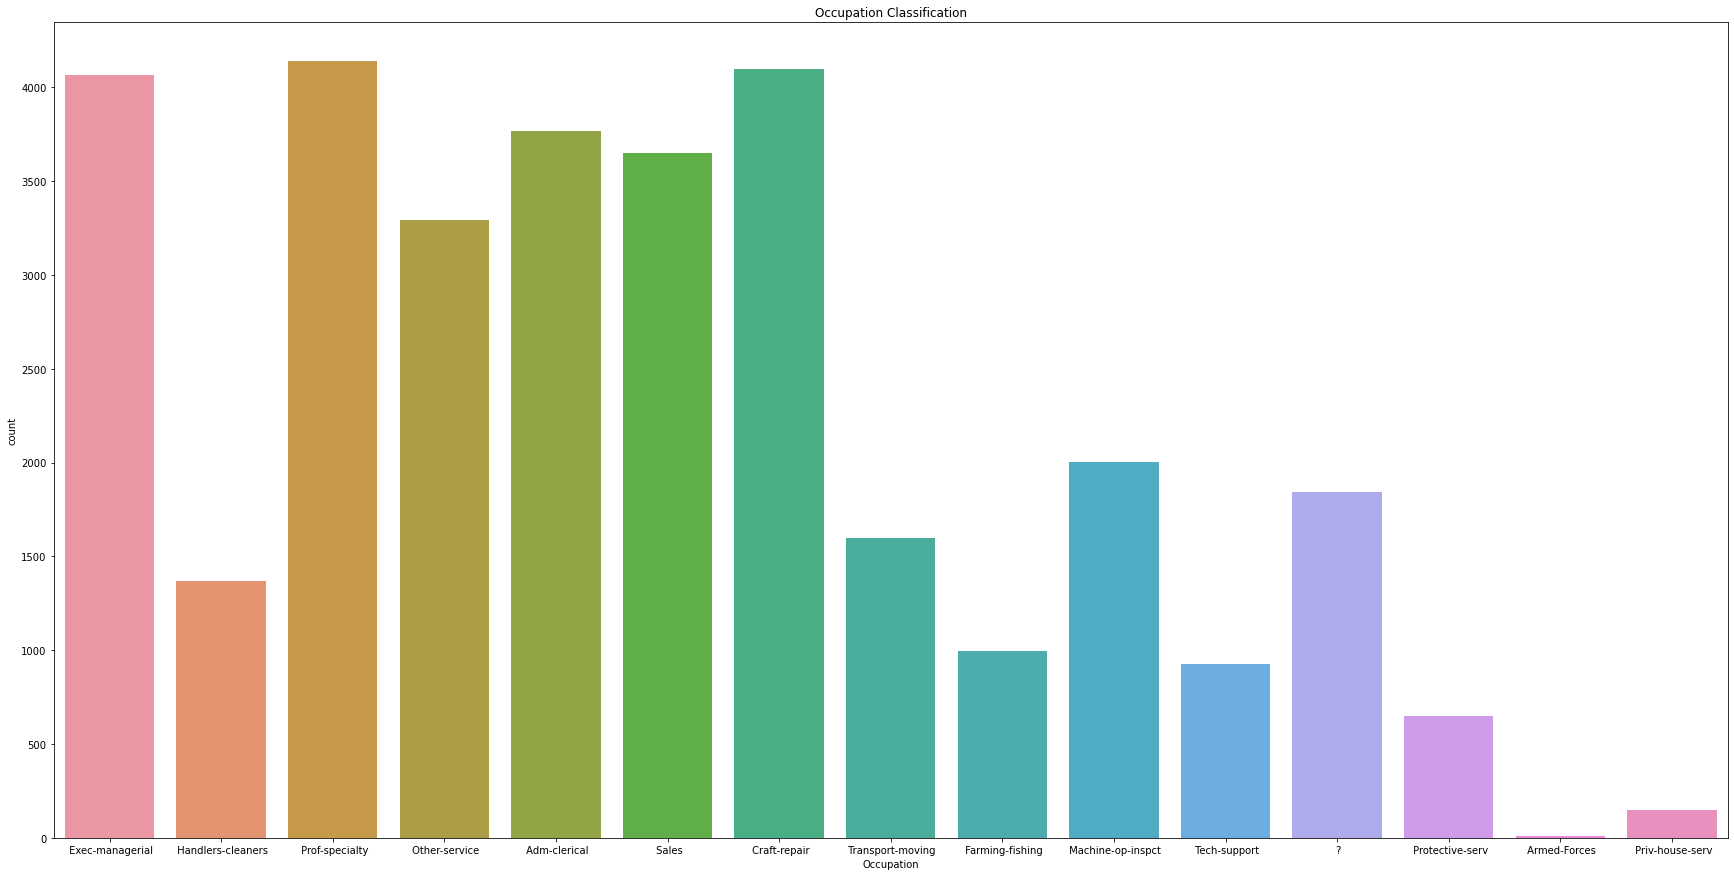

In [11]:
plt.figure(figsize=[30,15])
sns.countplot(df['Occupation'])
plt.title('Occupation Classification')

Text(0.5, 1.0, 'Relationship Classification')

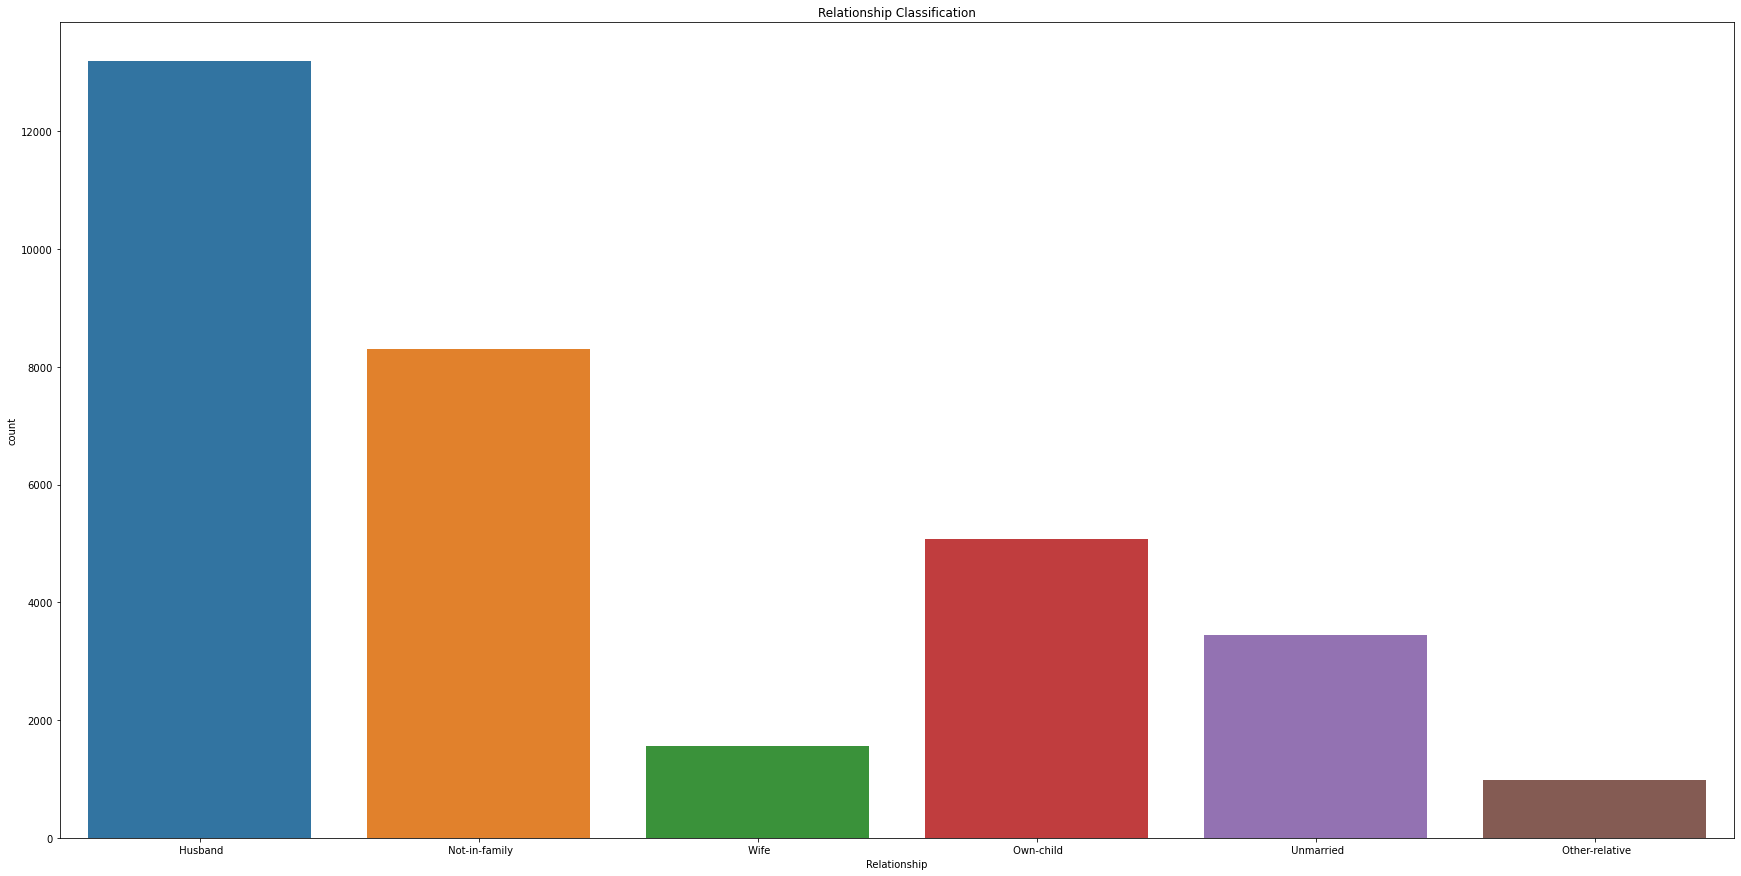

In [12]:
plt.figure(figsize=[30,15])
sns.countplot(df['Relationship'])
plt.title('Relationship Classification')

Text(0.5, 1.0, 'Race Classification')

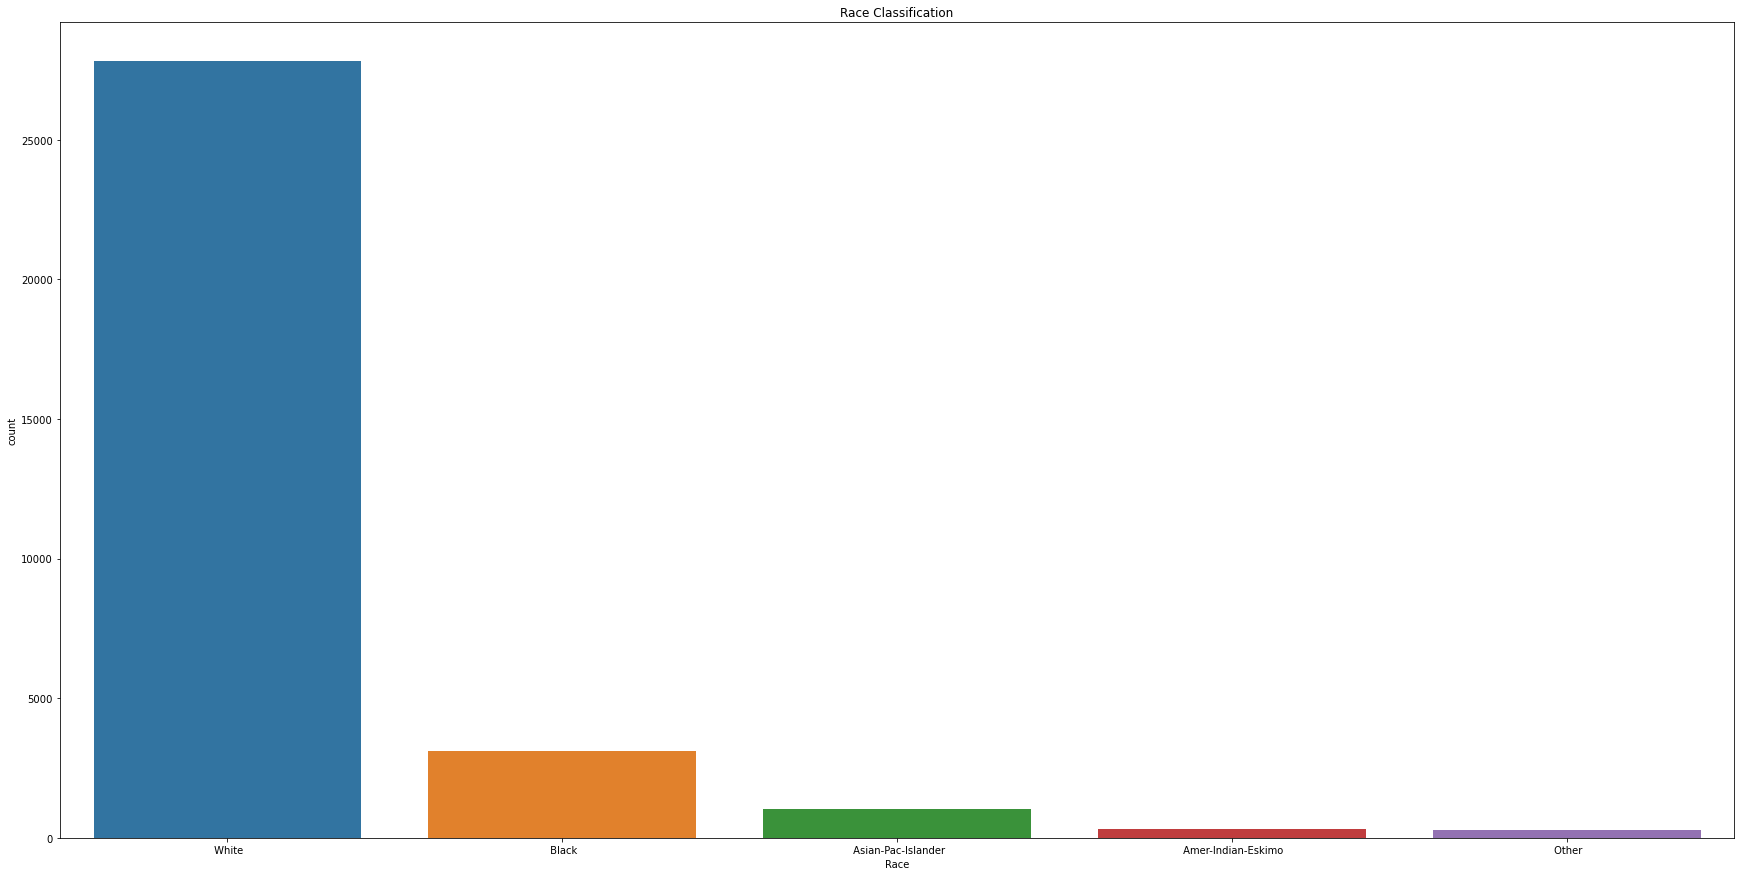

In [13]:
plt.figure(figsize=[30,15])
sns.countplot(df['Race'])
plt.title('Race Classification')

Text(0.5, 1.0, 'Sex Classification')

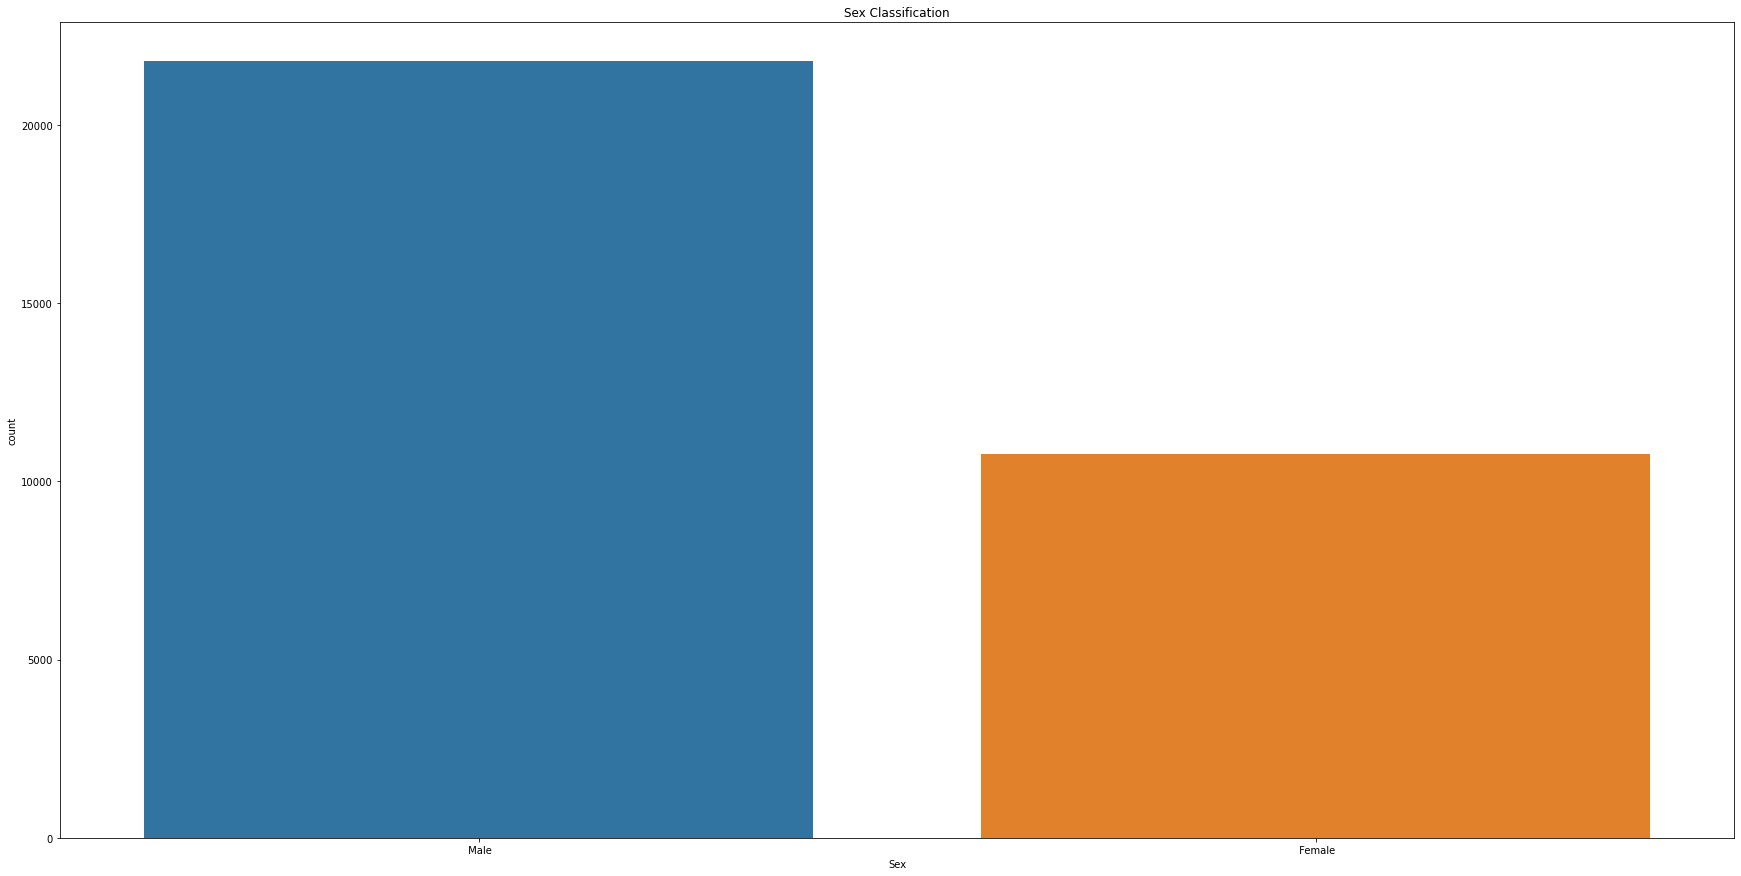

In [14]:
plt.figure(figsize=[30,15])
sns.countplot(df['Sex'])
plt.title('Sex Classification')

Text(0.5, 1.0, 'Hours Per Week Classification')

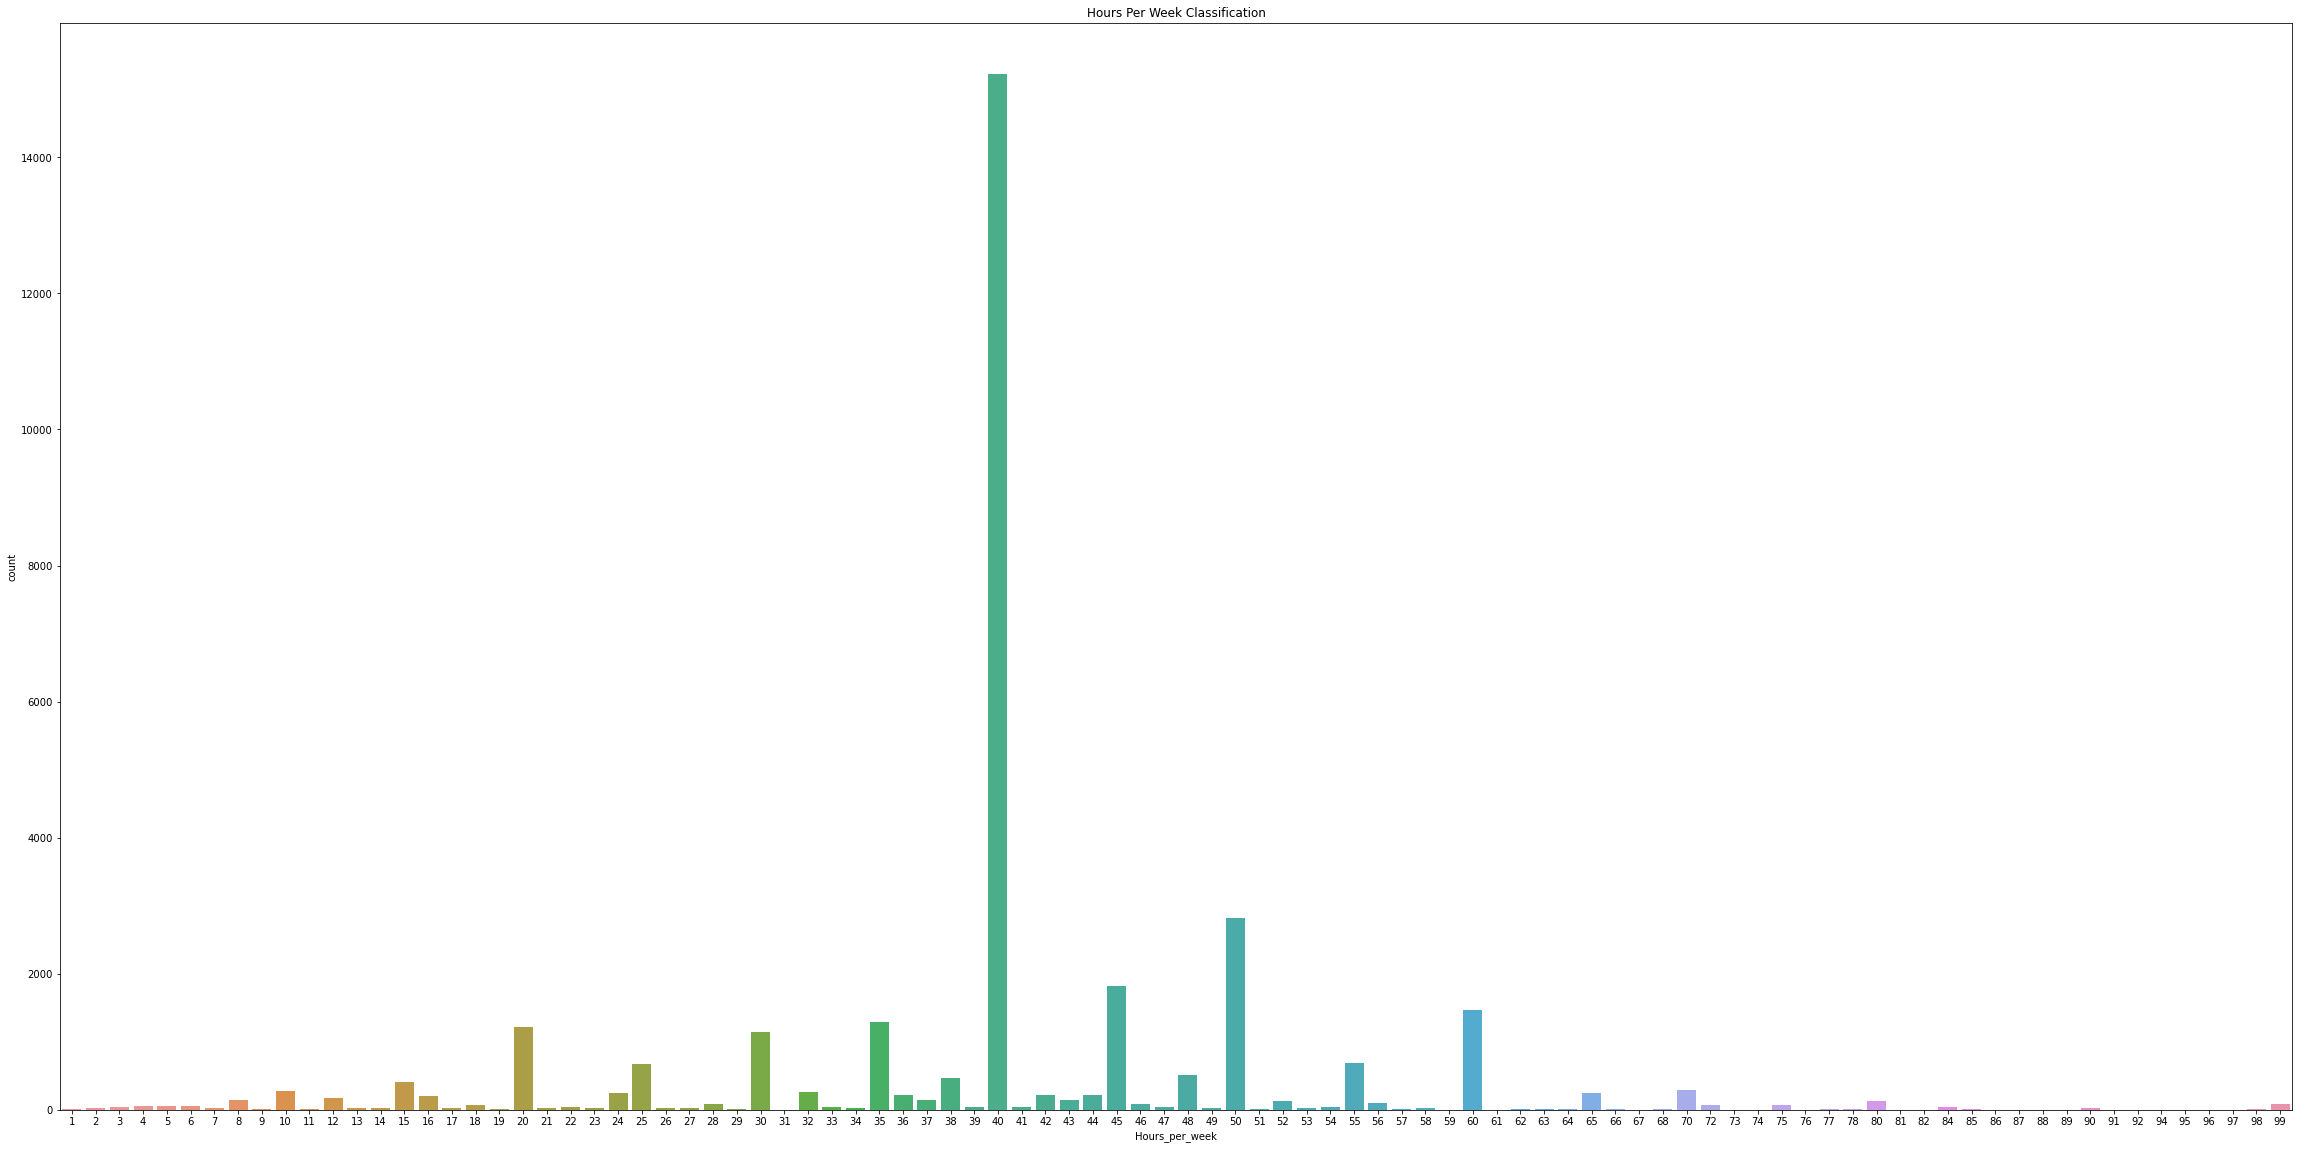

In [15]:
plt.figure(figsize=[40,20])
sns.countplot(df['Hours_per_week'])
plt.title('Hours Per Week Classification')

Observations:: 
        
        1. In workclass variable, we have 9 categories. It do have "?" category too. The data among them is quite imbalanced. 
        2. In education variable, we have 16 variables, the minimum category we have is of preschool and the maximum is of doctorate. 
        3. Education_num variable is quite irrelevent for the target variable. We might drop it while moving further. 
        4. In marital_status, we do have  7 categories. 
        5. In occupation, we have 15 categories plus we have "?" as well. 
        6. In relationship variable, we have 6 categories. 
        7. In race, we have 5 categories. 
        8. In sex category, we only have two categories - male and female - here data is quite imblanced. 
        9. Capital gain and capital loss is quite irrelevent for the target variable. We might drop it while moving further. 
        10. Hours per week actually shows how much hours person works in a complete week. It does have significance with the target variable. 
        11. Native country also hold great significance with the income classification. 

# Correcting the Dataset now: 

In [16]:
## We are dropping the capital gain and capital loss variable, majority of the variables are of 0 value. 
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

In [17]:
## Filling the values "?" that are avilable in workclass and occupation for better training of the model further. 
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [18]:
### Aggregating the some variables categories alltogether to make more smooth model. 
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov'],' Government Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc'],' Private Sector and Self Employeed')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not Working Currently ')
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors',],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],'Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

In [19]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')

In [20]:
df.tail(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
32555,27,Private Sector and Self Employeed,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private Sector and Self Employeed,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private Sector and Self Employeed,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private Sector and Self Employeed,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K
32559,52,Private Sector and Self Employeed,287927,High-School,9,Married,Exec-managerial,Wife,White,Female,40,United-States,>50K


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


Observations: 
    
    1. Standard deviation is quite hight, huge outliers values exsist in the dataset. 
    2. Mean is higher than median value, the data is not normally distributed - it is skewed to the right!
    3. Each variable holds equal number of the rows. 

# Performing the univariate analysis: 

<AxesSubplot:xlabel='Workclass', ylabel='count'>

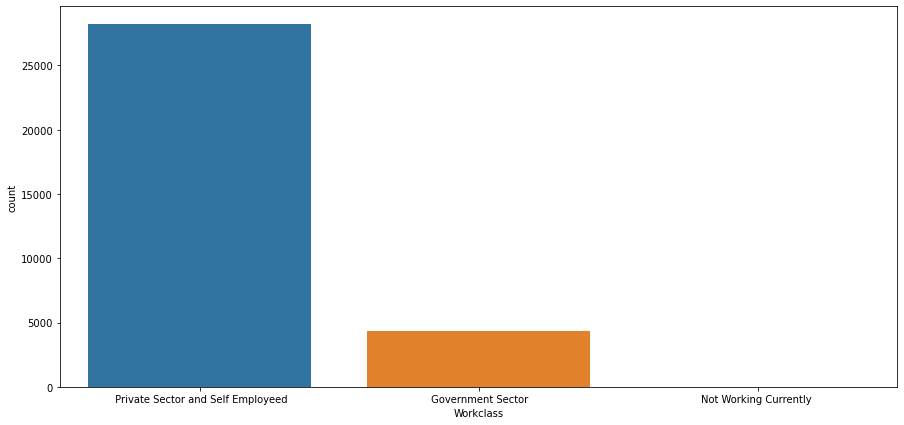

In [22]:
plt.figure(figsize = [15,7])
sns.countplot(df['Workclass'])

We do have high number of people who are self employed or employed in private sector. 

<AxesSubplot:xlabel='Education', ylabel='count'>

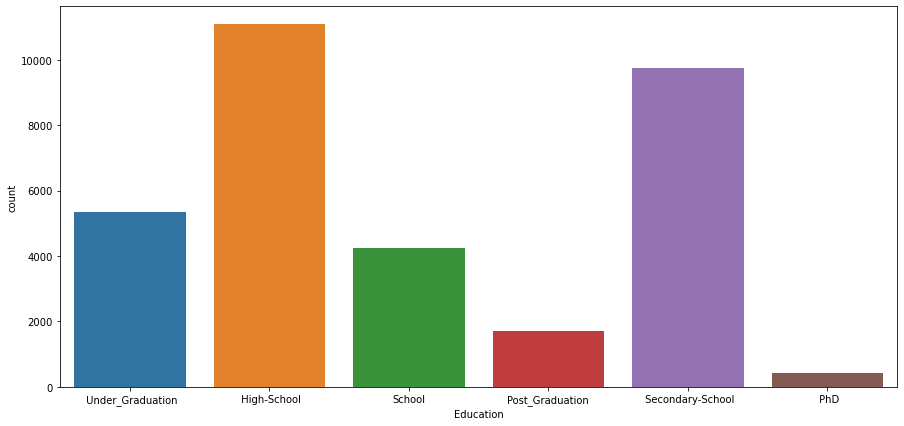

In [23]:
plt.figure(figsize = [15,7])
sns.countplot(df['Education'])

The maximum number of education level people hold is till high school and secondary school. Very less people has done PhD. 

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

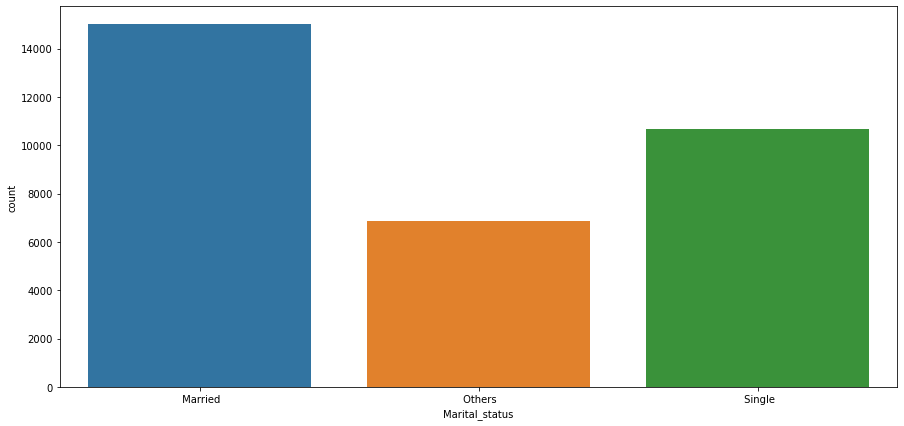

In [24]:
plt.figure(figsize = [15,7])
sns.countplot(df['Marital_status'])

Majority of population is married, very less number people are classified as others. 

<AxesSubplot:xlabel='Relationship', ylabel='count'>

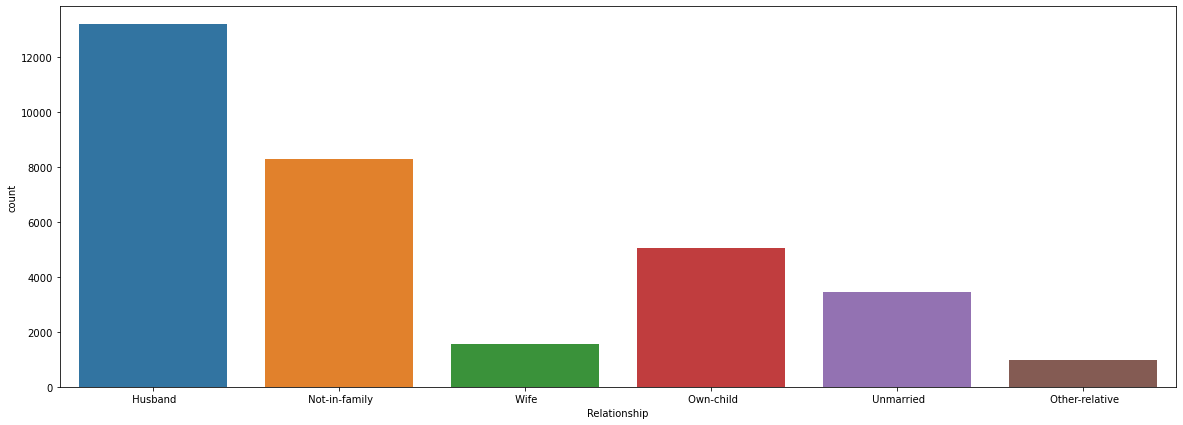

In [25]:
df["Relationship"].value_counts()
plt.figure(figsize = [20,7])
sns.countplot(df['Relationship'])

Major popluation comes in category husband and not-in-family category.

# Performing the bivariate analysis now - 

<Figure size 1440x720 with 0 Axes>

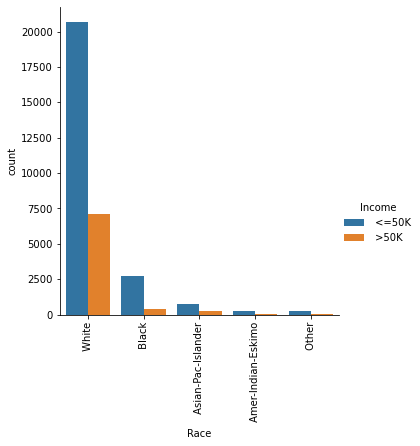

In [26]:
plt.figure(figsize = [20,10])
sns.factorplot('Race',kind='count',data=df,hue='Income')
plt.xticks(rotation=90);

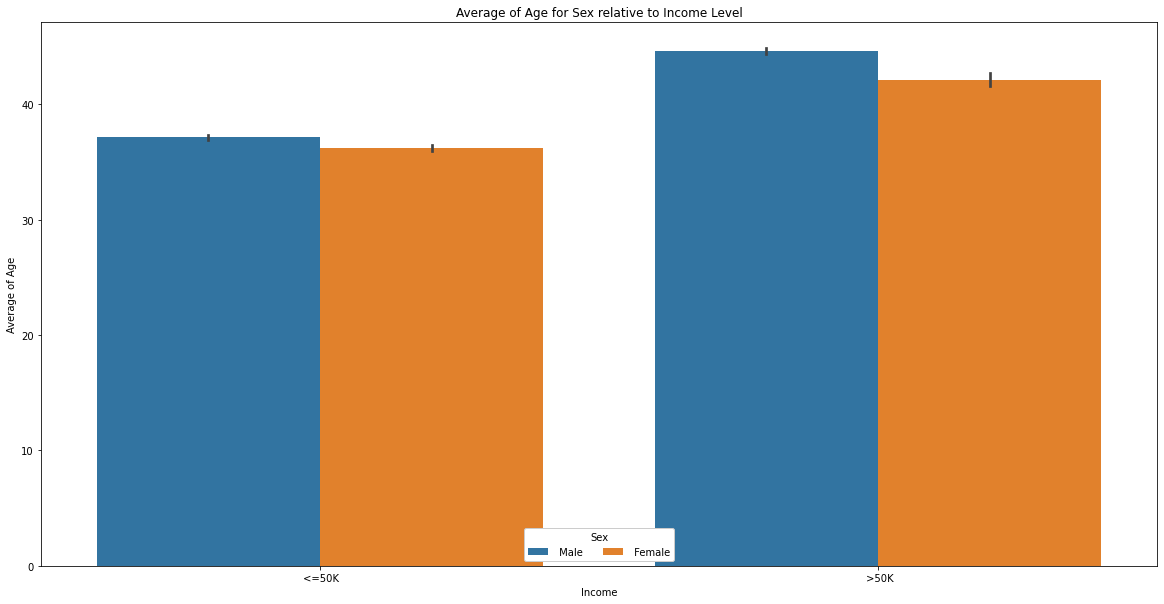

In [27]:
plt.figure(figsize=[20,10])
ax = sns.barplot(data = df, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income Level')
plt.xlabel('Income')
plt.ylabel('Average of Age');

Majority of the people that makes over 50K monthly are in the age group of above 40 and male earns comparitevly more to the female. 

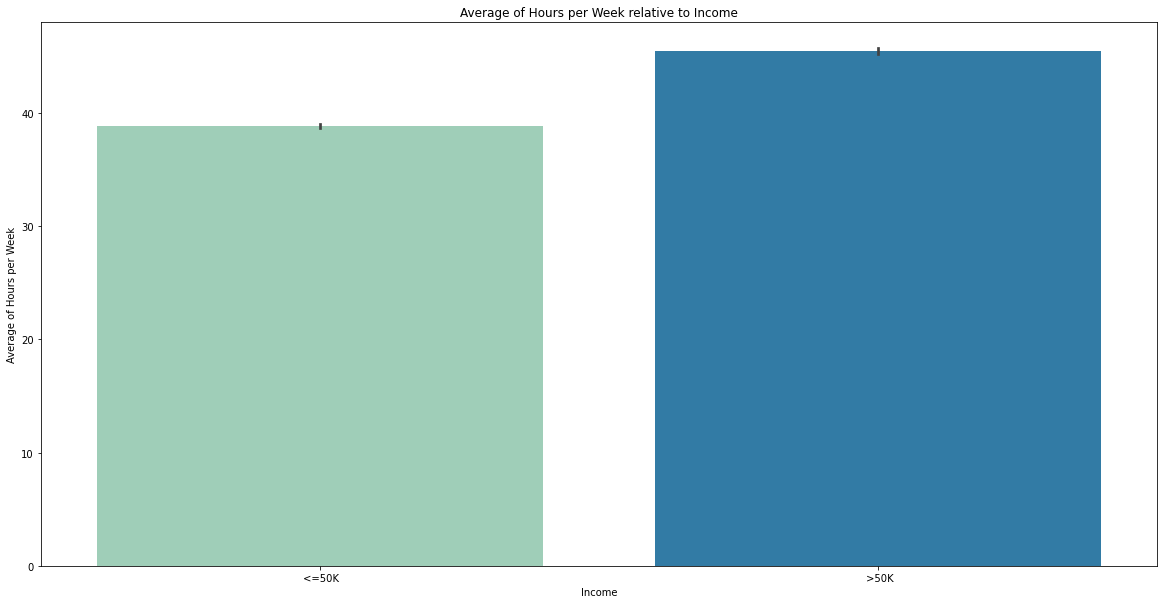

In [28]:
plt.figure(figsize=[20,10])
sns.barplot(data=df, x='Income', y='Hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income')
plt.ylabel('Average of Hours per Week');

Generally who work more than 40 hours per week makes more than 50K monthly. 

In [29]:
num=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num.append(i)

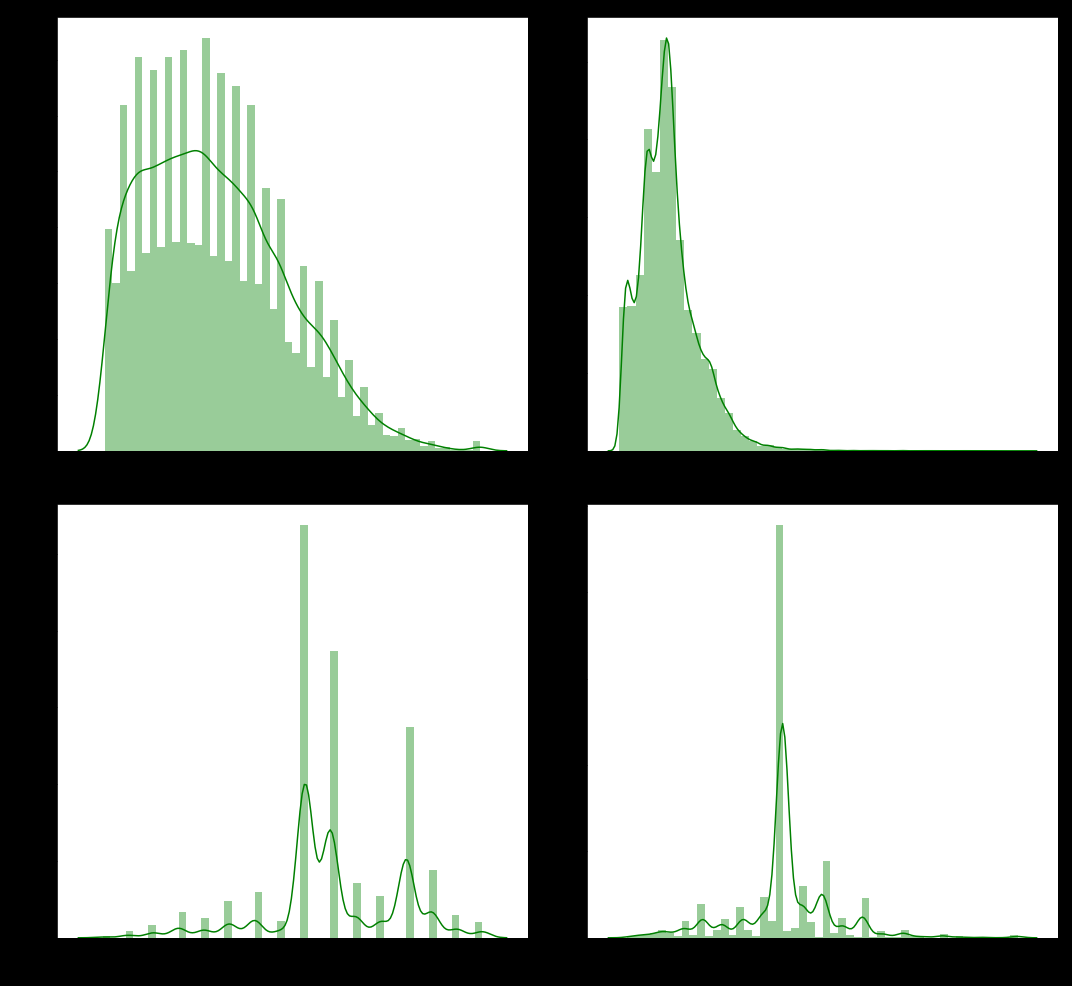

In [30]:
plt.figure(figsize=(15,20),facecolor='black')
plotnumber=1
for column in num:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column],color="green")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Data is generally rightly skewed and it is not normally distributed.

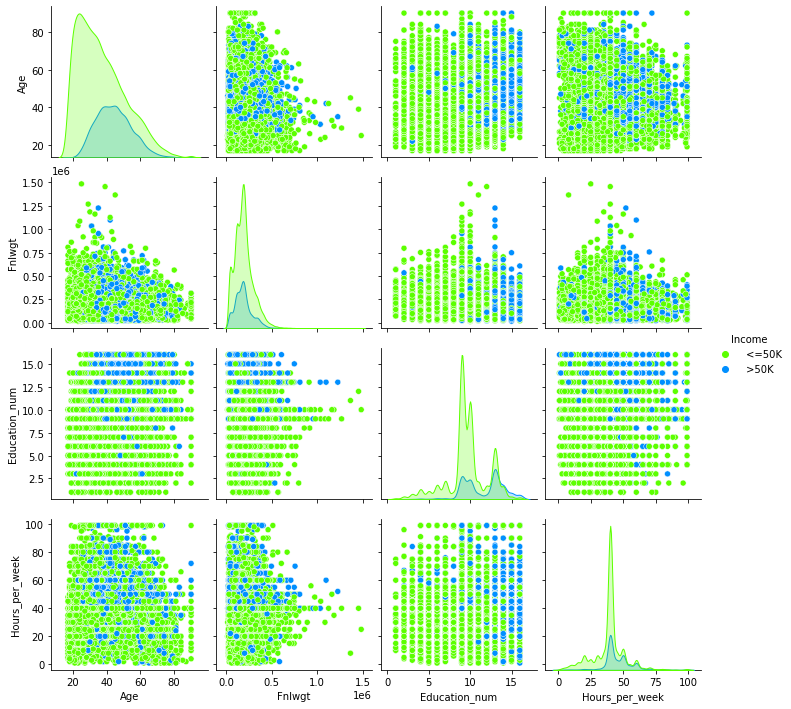

In [31]:
sns.pairplot(df,hue="Income",palette="gist_rainbow")

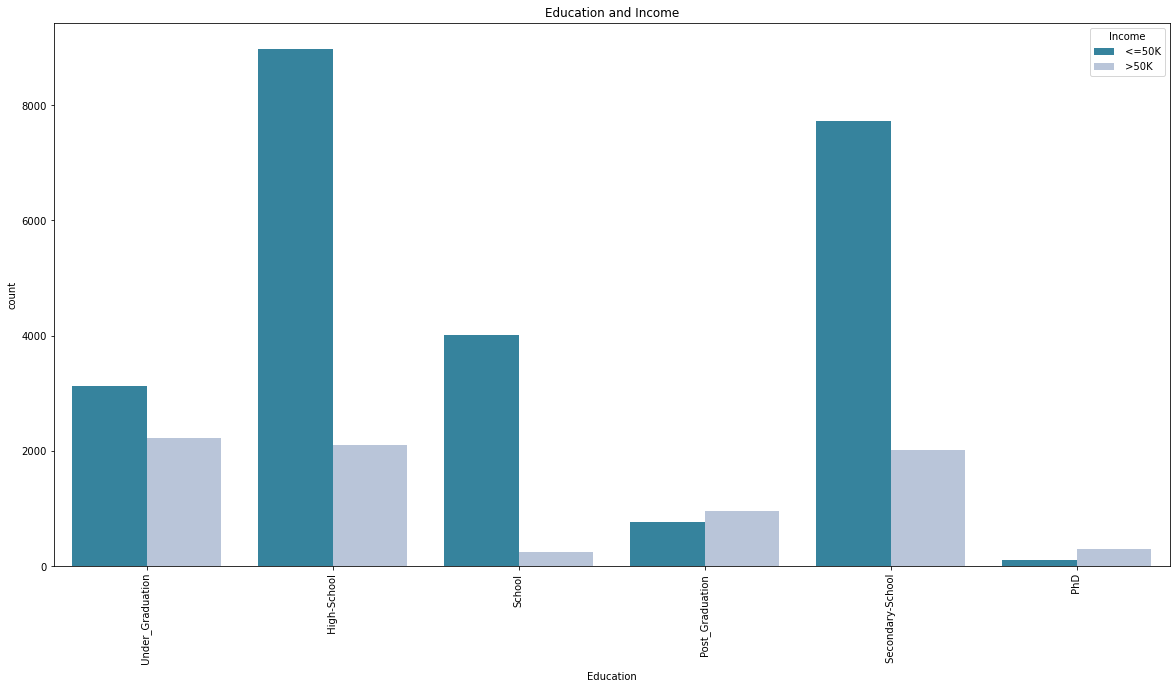

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(df["Education"],hue=df["Income"],palette="PuBuGn_r" )
plt.title("Education and Income")
plt.xticks(rotation=90)
plt.show()

Undergradauate, highschool, and secondary school make over 50 K monthly majority of the times as compared to other education level.

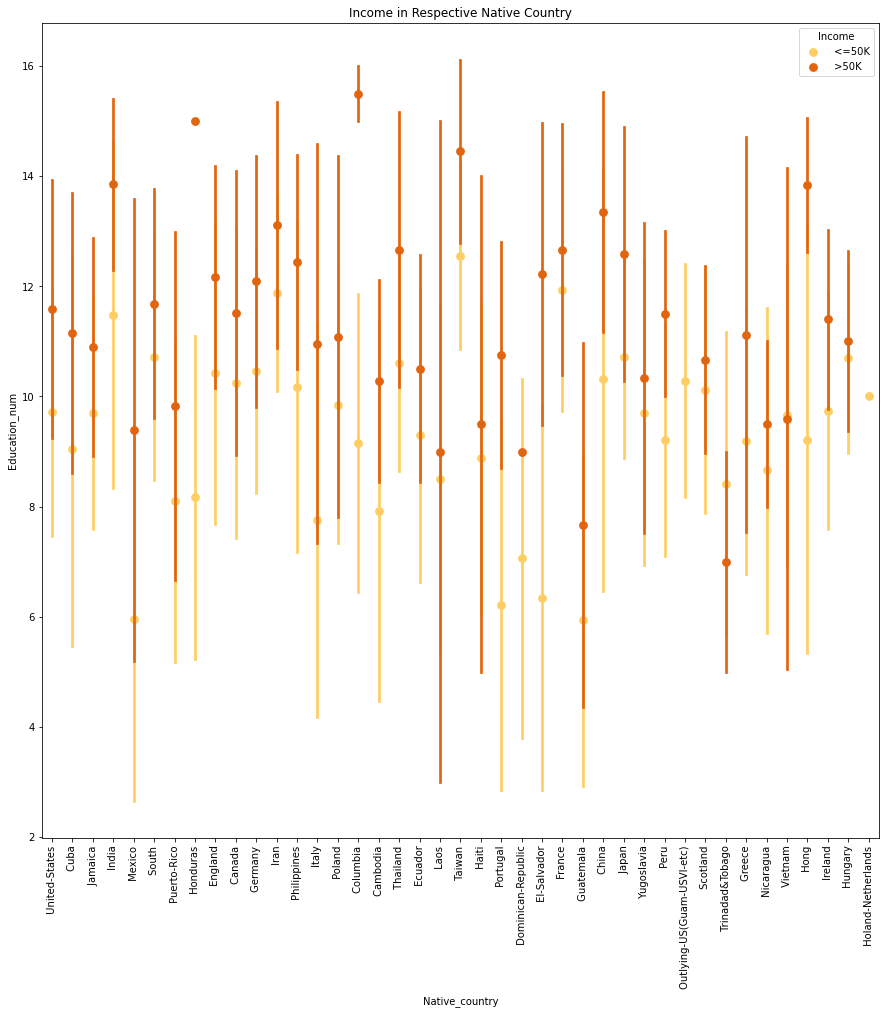

In [33]:
plt.figure(figsize=(15,15))
plt.title("Income in Respective Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="YlOrBr",ci="sd")
plt.xticks(rotation=90)
plt.show()

# Encoding the object type variables now: 

In [34]:
le = LabelEncoder()
df['Workclass'] = le.fit_transform(df['Workclass'])
df['Education'] = le.fit_transform(df['Education'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Native_country'] = le.fit_transform(df['Native_country'])
df['Income'] = le.fit_transform(df['Income'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Hours_per_week  32560 non-null  int64
 11  Native_country  32560 non-null  int32
 12  Income          32560 non-null  int32
dtypes: int32(9), int64(4)
memory usage: 2.1 MB


# Looking at the outleirs now and removing them - 

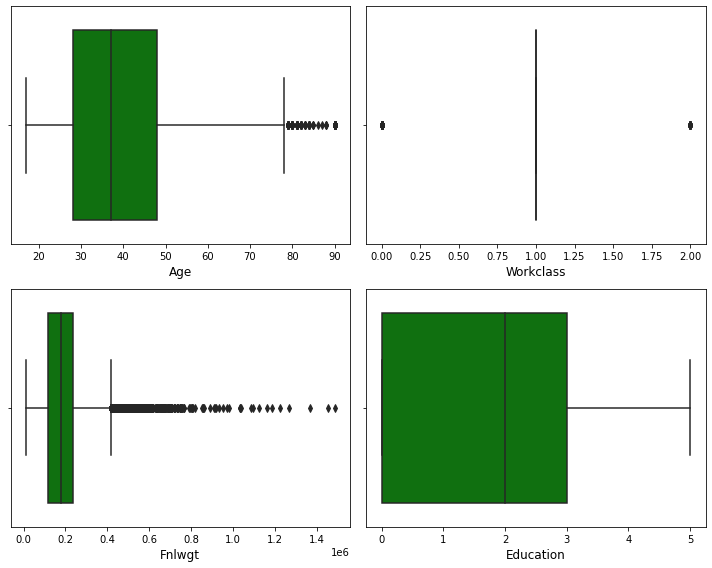

In [36]:
plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color="g")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We do have outliers available in age, workclass, and Fnlwgt. 

In [37]:
z = np.abs(zscore(df))

In [38]:
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([11, 10,  8, ...,  8,  8,  8], dtype=int64))

In [39]:
df_new = df[(z<3).all(axis=1)]
print(df_new.shape)

(29289, 13)


In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29289 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             29289 non-null  int64
 1   Workclass       29289 non-null  int32
 2   Fnlwgt          29289 non-null  int64
 3   Education       29289 non-null  int32
 4   Education_num   29289 non-null  int64
 5   Marital_status  29289 non-null  int32
 6   Occupation      29289 non-null  int32
 7   Relationship    29289 non-null  int32
 8   Race            29289 non-null  int32
 9   Sex             29289 non-null  int32
 10  Hours_per_week  29289 non-null  int64
 11  Native_country  29289 non-null  int32
 12  Income          29289 non-null  int32
dtypes: int32(9), int64(4)
memory usage: 2.1 MB


In [41]:
df.shape

(32560, 13)

In [42]:
df = df_new

# Looking at the skewness dataset holds - 

In [43]:
df.skew()

Age               0.466083
Workclass        -2.129943
Fnlwgt            0.629350
Education         0.348872
Education_num    -0.134619
Marital_status    0.256641
Occupation        0.012625
Relationship      0.788850
Race             -2.621856
Sex              -0.716780
Hours_per_week   -0.348301
Native_country   -5.522265
Income            1.198322
dtype: float64

<AxesSubplot:ylabel='Density'>

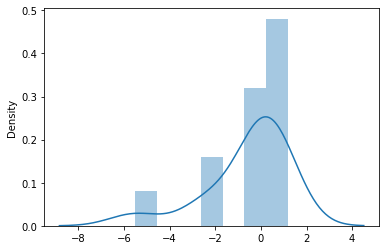

In [44]:
sns.distplot(df.skew())

Data is skewed. Rectifying it with power transform method.

In [45]:
from sklearn.preprocessing import power_transform
df[['Workclass','Race','Native_country']] = power_transform(df[['Workclass','Race','Native_country']], method = 'yeo-johnson')

In [46]:
df.skew()

Age               0.466083
Workclass        -2.129943
Fnlwgt            0.629350
Education         0.348872
Education_num    -0.134619
Marital_status    0.256641
Occupation        0.012625
Relationship      0.788850
Race             -2.558606
Sex              -0.716780
Hours_per_week   -0.348301
Native_country    2.038790
Income            1.198322
dtype: float64

<AxesSubplot:ylabel='Density'>

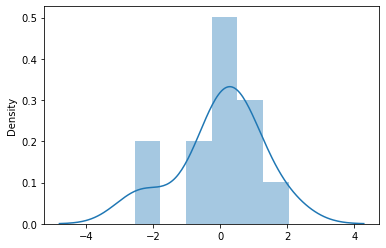

In [47]:
sns.distplot(df.skew())

# Checking the correlation variables hold - 

In [48]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.086553,-0.075815,-0.008948,0.056180,-0.476633,0.000691,-0.271267,0.028144,0.094680,0.096384,0.032193,0.250845
Workclass,-0.086553,1.000000,0.008075,-0.039920,-0.160212,0.034366,0.005843,0.000516,0.057101,0.037299,-0.004486,-0.030156,-0.061499
Fnlwgt,-0.075815,0.008075,1.000000,0.008460,-0.036700,0.037925,0.003308,0.013498,-0.100095,0.023450,-0.017903,-0.090329,-0.010233
Education,-0.008948,-0.039920,0.008460,1.000000,-0.042026,0.038945,0.073569,-0.000522,0.001703,0.002573,-0.053608,-0.081587,0.038452
Education_num,0.056180,-0.160212,-0.036700,-0.042026,1.000000,-0.066894,0.076999,-0.098098,0.088962,0.010863,0.165708,0.135439,0.338203
Marital_status,-0.476633,0.034366,0.037925,0.038945,-0.066894,1.000000,0.000888,0.456314,-0.114300,-0.342325,-0.243814,-0.008082,-0.427265
Occupation,0.000691,0.005843,0.003308,0.073569,0.076999,0.000888,1.000000,-0.039334,0.001632,0.048122,-0.019529,0.012293,0.034230
Relationship,-0.271267,0.000516,0.013498,-0.000522,-0.098098,0.456314,-0.039334,1.000000,-0.144134,-0.582853,-0.268755,-0.021189,-0.252670
Race,0.028144,0.057101,-0.100095,0.001703,0.088962,-0.114300,0.001632,-0.144134,1.000000,0.124113,0.059492,0.033279,0.099531
Sex,0.094680,0.037299,0.023450,0.002573,0.010863,-0.342325,0.048122,-0.582853,0.124113,1.000000,0.242315,-0.001204,0.217713


<AxesSubplot:>

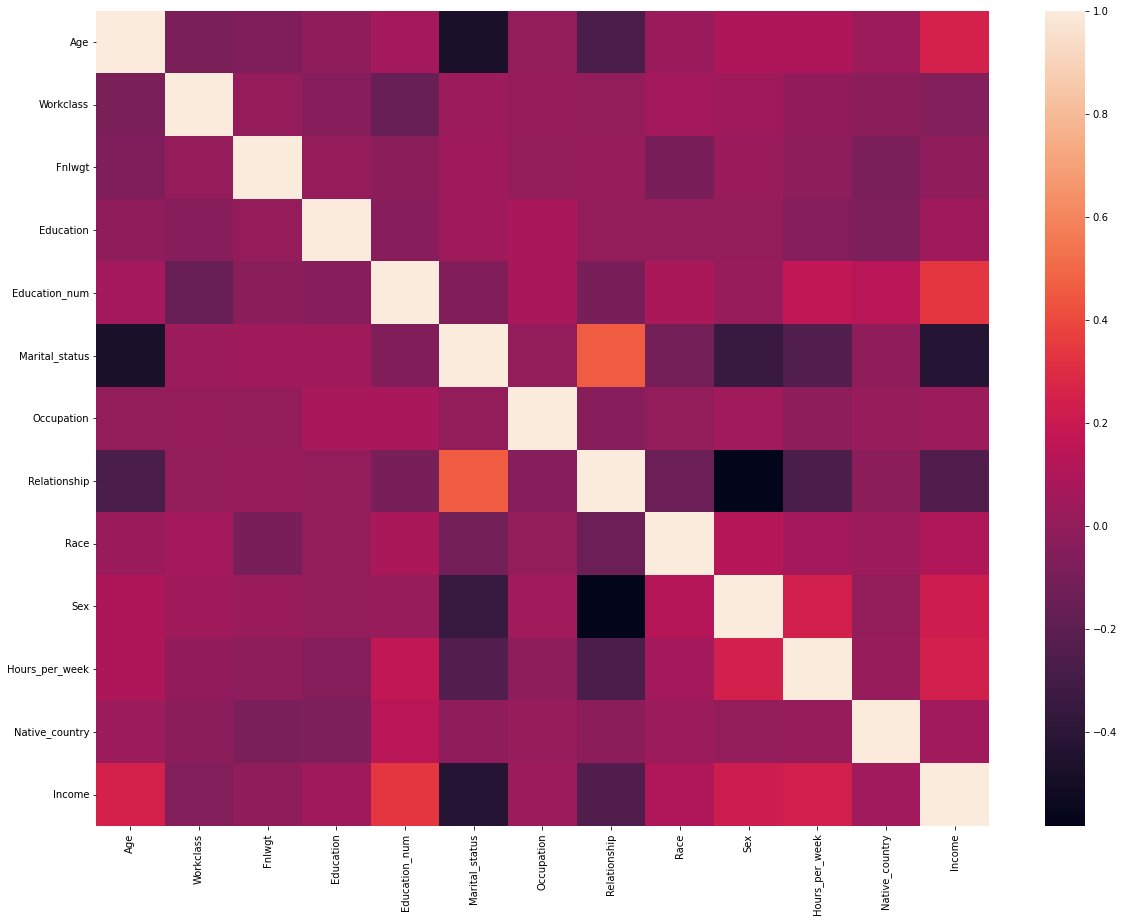

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

Observation :: 
        
        1. Data do not hold any kind of multicollinerity among the variables. 
        2. Both the variables - Workclass and Fnlwgt hold very less correlation with the income target.
        3. Education_num, Age, Sex and Hours_per_week has very high positive correlation with the income target variable. 

# Seperating the variables in feature and target variable - 

In [50]:
x = df.drop("Income", axis=1)
y = df["Income"]

In [51]:
x.shape

(29289, 12)

In [52]:
y.shape

(29289,)

# Standard scaling the variables - 

In [75]:
scale = StandardScaler()
x = pd.DataFrame(np.abs(scale.fit_transform(x)), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.871369,0.395921,1.087207,0.631378,1.174830,0.989192,0.779952,0.898112,0.344482,0.703904,2.426023,0.156724
1,0.026678,0.395921,0.313067,1.142136,0.461365,0.148544,0.279118,0.275071,0.344482,0.703904,0.010690,0.156724
2,1.095880,0.395921,0.514905,1.813721,1.279463,0.989192,0.279118,0.898112,2.905994,0.703904,0.010690,0.156724
3,0.101515,0.395921,1.042498,1.222549,1.583879,0.989192,0.779952,2.217095,0.344482,1.420648,0.010690,0.156724
4,0.796531,0.395921,0.273760,1.813721,2.097560,0.148544,0.221715,0.275071,2.905994,1.420648,2.157652,4.512172
...,...,...,...,...,...,...,...,...,...,...,...,...
29284,0.849888,0.395921,0.753841,0.040207,0.765781,0.989192,1.473797,2.217095,0.344482,1.420648,0.189603,0.156724
29285,0.122996,0.395921,0.335269,1.142136,0.461365,0.989192,0.028702,0.898112,0.344482,0.703904,0.010690,0.156724
29286,1.470066,0.395921,0.361342,1.142136,0.461365,0.148544,1.531201,1.594053,0.344482,1.420648,0.010690,0.156724
29287,1.224074,0.395921,0.163278,1.142136,0.461365,1.286279,1.531201,0.971012,0.344482,0.703904,1.799825,0.156724


# Balancing The Data: 

In [53]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

# Splitting the train and test data now - 

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [55]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8255280763737503
[[5472 1232]
 [1089 5510]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      6704
           1       0.82      0.83      0.83      6599

    accuracy                           0.83     13303
   macro avg       0.83      0.83      0.83     13303
weighted avg       0.83      0.83      0.83     13303



In [56]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8648425167255507
[[5720  984]
 [ 814 5785]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      6704
           1       0.85      0.88      0.87      6599

    accuracy                           0.86     13303
   macro avg       0.87      0.86      0.86     13303
weighted avg       0.87      0.86      0.86     13303



In [57]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.5039464782379914
[[6704    0]
 [6599    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      6704
           1       0.00      0.00      0.00      6599

    accuracy                           0.50     13303
   macro avg       0.25      0.50      0.34     13303
weighted avg       0.25      0.50      0.34     13303



In [58]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.6747350221754491
[[3995 2709]
 [1618 4981]]
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      6704
           1       0.65      0.75      0.70      6599

    accuracy                           0.67     13303
   macro avg       0.68      0.68      0.67     13303
weighted avg       0.68      0.67      0.67     13303



In [59]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8636397805006389
[[5572 1132]
 [ 682 5917]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      6704
           1       0.84      0.90      0.87      6599

    accuracy                           0.86     13303
   macro avg       0.87      0.86      0.86     13303
weighted avg       0.87      0.86      0.86     13303



# Cross Validating The Scores Of Different Models - 

In [60]:
from sklearn.model_selection import cross_val_score
print("DTC:", cross_val_score(DTC,x,y,cv=5).mean())
print("RFC:",cross_val_score(RFC,x,y,cv=5).mean())
print("LR:",cross_val_score(LR,x,y,cv=5).mean())
print("KNN:",cross_val_score(knn,x,y,cv=5).mean())
print("GB:",cross_val_score(GB,x,y,cv=5).mean())

DTC: 0.8211888164382148
RFC: 0.8580388283873122
LR: 0.6205420674089805
KNN: 0.6927298833168984
GB: 0.8543621707087876


# Performing hyper parameter tuning - 

In [61]:
from sklearn.model_selection import GridSearchCV
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}
GC=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [ ]:
GC.best_params_

In [ ]:
Finmodel=RandomForestClassifier(criterion='gini',max_depth=25, max_features='auto', n_estimators=400)
Finmodel.fit(x_train,y_train)
pred=Finmodel.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

# Drawing the ROC-AUC curve now - 

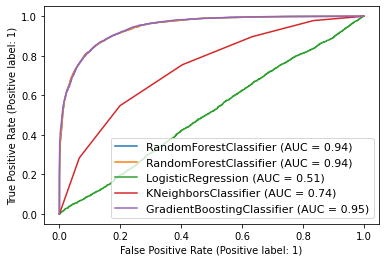

In [63]:
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(RFC,x_test,y_test)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

The best AUC ROC score  is 95% which is given by the GradientBBoostingClassifier model.

# Saving the model now - 


In [66]:
# Saving the model using .pkl
import joblib
joblib.dump(GB,"CensusIncomePrediction.pkl")

['CensusIncomePrediction.pkl']

# Making the predictions now - 

In [67]:
model=joblib.load("CensusIncomePrediction.pkl")
prediction = model.predict(x_test)
prediction

array([1, 1, 0, ..., 0, 0, 1])

In [68]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
13298,0,0
13299,1,1
13300,0,0
13301,0,1
